In [68]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

nba = pd.read_csv("nba.csv")

data = pd.DataFrame(nba)

data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [69]:
bulls = data.groupby("Team").get_group("Chicago Bulls")
rockets = data.groupby("Team").get_group("Houston Rockets")

new_data = pd.concat([bulls, rockets])

salary = new_data["Salary"]
age = new_data["Age"]
team = new_data["Team"]
position = new_data["Position"]

res = pd.concat([age, salary, team, position], axis = 1)

res

,Age,Salary,Team,Position
151,25.0,845059.0,Chicago Bulls,PF
152,31.0,2250000.0,Chicago Bulls,PG
153,26.0,16407500.0,Chicago Bulls,SG
154,35.0,4500000.0,Chicago Bulls,SG
155,23.0,525093.0,Chicago Bulls,PF
156,35.0,7448760.0,Chicago Bulls,C
157,30.0,8500000.0,Chicago Bulls,PF
158,27.0,947276.0,Chicago Bulls,SG
159,24.0,2380440.0,Chicago Bulls,SF
160,25.0,5543725.0,Chicago Bulls,PF


<AxesSubplot:xlabel='Age', ylabel='Salary'>

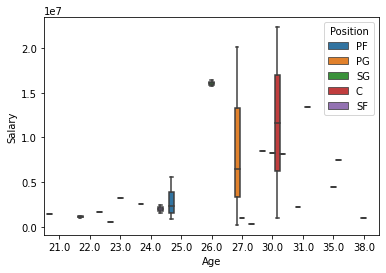

In [70]:
sns.boxplot(x = res["Age"], y = res["Salary"], hue = res["Position"])

1. 포인트가드와 센터 포지션의 연봉 격차가 매우 크므로, 아마 팀에 해당 포지션들의 스타플레이어가 속해있을 가능성이 매우 높습니다.

2. 31세 전까진 나이가 많아질 수록 받는 평균적인 연봉의 금액은 대체적으로 증가하는 추세이지만, 개인의 경우에는 그렇지 못한 경우도 있습니다.

3. 26세부터 31세 초반부분까지의 연봉 격차가 매우 높고, 분포해 있는 사람의 수도 많으며 이후에는 분포 및 연봉 모두 급격하게 줄어드므로 이 구간이 운동선수로서의 전성기라 할 수 있습니다. 

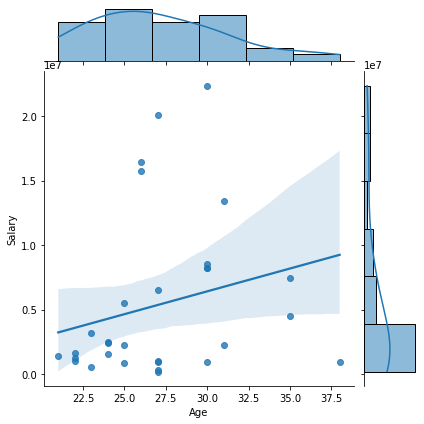

In [71]:
sns.jointplot(x = res["Age"], y = res["Salary"], kind = "reg")

1. 나이가 들수록 받는 연봉도 같이 증가합니다.

2. 선수들 연봉의 대부분은 4M $ 이하입니다.

3. 선수들의 나이는 대부분 30대 초반보다 어립니다.

<AxesSubplot:xlabel='Age', ylabel='count'>

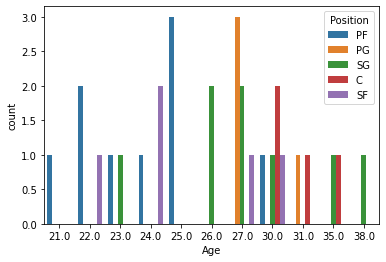

In [72]:
sns.countplot(x = "Age", data = res, hue = "Position")

1. 센터와 슈팅가드 포지션은 나이가 들어도 충분히 역할을 할 수 있는 포지션처럼 보입니다.

2. 포인트가드 포지션은 선수로서의 전성기 구간에 대부분 분포해 있으므로 게임의 중심축 역할을 하는 포지션처럼 보입니다.

3. 파워포워드, 스몰포워드 모두 30대 초반을 넘기면 보이지 않기 때문에 수명이 짧은 포지션처럼 보입니다.